In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline
# output_notebook()

In [2]:
!ls data

sample_submission.csv
sample_submission.csv.7z
test.tsv
test.tsv.7z
train.tsv
train.tsv.7z


In [3]:
data_dir = './data'

sample_file = os.path.join(data_dir, 'sample_submission.csv')
train_file = os.path.join(data_dir, 'train.tsv')
test_file = os.path.join(data_dir, 'test.tsv')

In [4]:
!head $train_file

train_id	name	item_condition_id	category_name	brand_name	price	shipping	item_description
0	MLB Cincinnati Reds T Shirt Size XL	3	Men/Tops/T-shirts		10.0	1	No description yet
1	Razer BlackWidow Chroma Keyboard	3	Electronics/Computers & Tablets/Components & Parts	Razer	52.0	0	This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2	AVA-VIV Blouse	1	Women/Tops & Blouses/Blouse	Target	10.0	1	Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!
3	Leather Horse Statues	1	Home/Home D茅cor/Home D茅cor Accents		35.0	1	New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4	24K GOLD plated rose	1	Women/Jewelry/Necklaces		44.0	0	Complete with certificate of authenticity
5	Bundle

In [5]:
train = pd.read_table(train_file)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [76]:
test = pd.read_table(test_file)
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [6]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [7]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [8]:
# 标题
ind_title_num = train['name'].apply(lambda x: '[rm]' in x)
ind_title_num.sum(), len(ind_title_num)

(7460, 1482535)

In [9]:
pd.concat([train['price'], ind_title_num], axis=1).groupby('name').median()         

,price
name,
False,17.0
True,15.0


[640549 432161 375479  31962   2384]


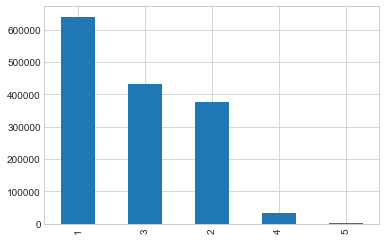

In [10]:
print(train['item_condition_id'].value_counts().values)
train['item_condition_id'].value_counts().plot(kind='bar')

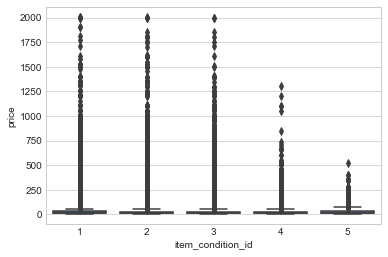

In [11]:
# train.groupby(['item_condition_id'])['price'].median().plot(kind='bar')
sns.boxplot(x='item_condition_id', y='price', data=train)

In [12]:
train['log_price'] = np.log2(train['price'] + 1)

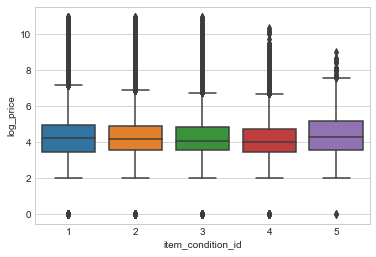

In [13]:
sns.boxplot(x='item_condition_id', y='log_price', data=train)

### 卖家提供item状况标识，item为5的是比较贵一些，1也稍微贵一些

In [14]:
train['category_name'] = train['category_name'].fillna('No-Cate/No-Cate/No-Cate')
# train['category_name'].value_counts()[:20]
# train['category_name'].apply(lambda x: pd.Series(x.split('/')))         # too slow
train['cat1'], train['cat2'], train['cat3'] = zip(*train['category_name'].apply(lambda x: x.split('/')))
train = train.drop('category_name', axis=1)

Index(['Handmade', 'Other', 'Beauty', 'Kids', 'Vintage & Collectibles',
       'No-Cate', 'Sports & Outdoors', 'Electronics', 'Home', 'Women', 'Men'],
      dtype='object', name='cat1')


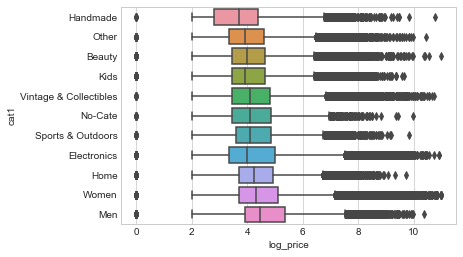

In [15]:
cat_name = 'cat1'
order_cnt = train.groupby([cat_name])['log_price'].mean().sort_values().index
print(order_cnt)
sns.boxplot(x='log_price', y=cat_name, data=train, order=order_cnt)

Index(['Paper Goods', 'Quilts', 'Trading Cards', 'Children', 'Magazines',
       'Artwork', 'Geekery', 'Books and Zines', 'Art', 'Needlecraft',
       ...
       'TV, Audio & Surveillance', 'Musical instruments', 'Shoes', 'Suits',
       'Bags and Purses', 'Footwear', 'Women's Handbags', 'Strollers',
       'Cameras & Photography', 'Computers & Tablets'],
      dtype='object', name='cat2', length=114)


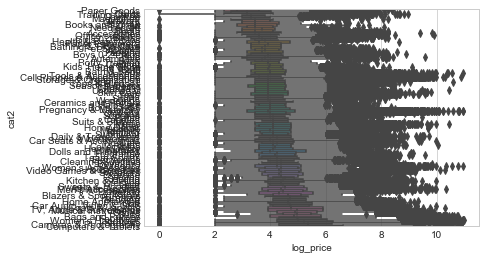

In [16]:
# train['cat1'] = train['cat1'].astype('category')
cat_name = 'cat2'
order_cnt = train.groupby([cat_name])['log_price'].mean().sort_values().index
print(order_cnt)

sns.boxplot(x='log_price', y=cat_name, data=train, order=order_cnt)

Index(['CM Style Fashion', 'Gossip Girl', 'A.B.S. by Allen Schwartz',
       'AA Aquarium', 'Revlon Colorsilk', 'Genica', 'Scunci', 'DUO',
       'Old Glory', 'Play MG',
       ...
       'Brioni', 'Stephen Webster', 'Proenza Schouler', 'Contours',
       'Frédérique Constant', 'Dainese', 'Blendtec', 'Longines', 'Oris',
       'Auto Meter'],
      dtype='object', name='brand_name', length=4810)


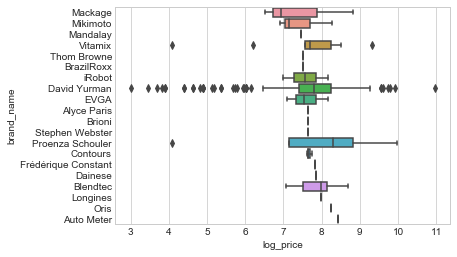

In [17]:
train['brand_name'] = train['brand_name'].fillna('No-Brand')
cnt_order = train.groupby('brand_name')['log_price'].mean().sort_values().index
print(cnt_order)
cnt_order = cnt_order[-20:]
ind = train['brand_name'].isin(cnt_order)
sns.boxplot(x='log_price', y='brand_name', data=train[ind], order=cnt_order)

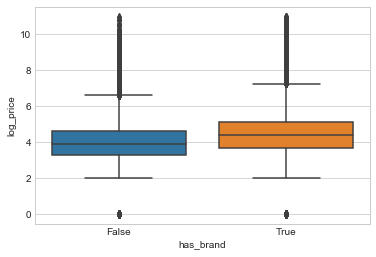

In [18]:
train['has_brand'] = train['brand_name'] != 'No-Brand'
sns.boxplot(x='has_brand', y='log_price', data=train)

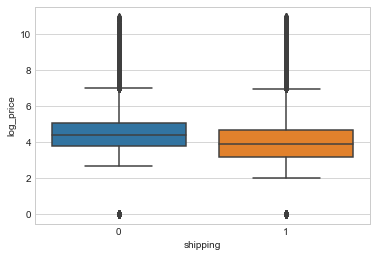

In [19]:
sns.boxplot(x='shipping', y='log_price', data=train)          # 是否出邮费

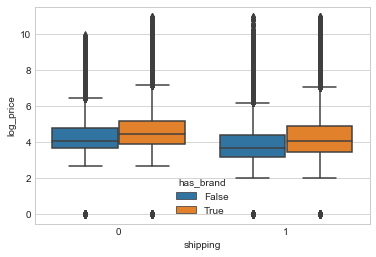

In [20]:
sns.boxplot(x='shipping', y='log_price', hue='has_brand', data=train)

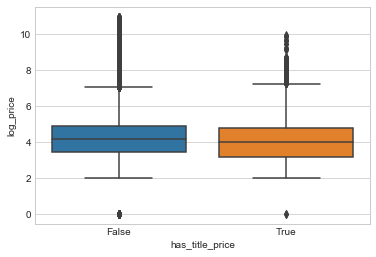

In [21]:
train['has_title_price'] = train['name'].apply(lambda x: '[rm]' in x)
sns.boxplot(x='has_title_price', y='log_price', data=train)          # 名称当中含有价格与否与价格相关性不是很大，可以不用考虑

In [22]:
import spacy

In [23]:
nlp = spacy.load('en')

In [24]:
ind = train['item_description'] == 'No description yet'
print('"No description yet" count: {}'.format(ind.sum()))
train.loc[ind, 'item_description'] = np.nan
train['item_description'].isnull().sum()

"No description yet" count: 82489


82493

In [25]:
train['item_description'][3]

'New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage'

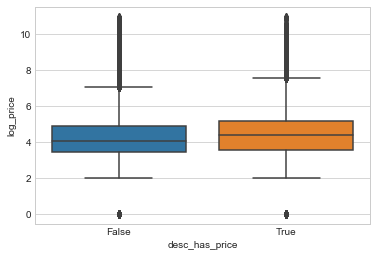

In [40]:
train['desc_has_price'] = train['item_description'].fillna('').apply(lambda x: '[rm]' in x)
sns.boxplot(x='desc_has_price', y='log_price', data=train)

# interesting that item description has a price number has a higher median price

In [26]:
tokens = nlp(train['item_description'][3])
for t in tokens:
    print(t, end=',')

New,with,tags,.,Leather,horses,.,Retail,for,[,rm,],each,.,Stand,about,a,foot,high,.,They,are,being,sold,as,a,pair,.,Any,questions,please,ask,.,Free,shipping,.,Just,got,out,of,storage,

In [27]:
for i, l in enumerate(nlp.vocab):
    print(l.vector[:5], len(l.vector), l.rank)          # 默认使用300维输出变量
    if i == 5:
        break

[ 0.042175    0.34913    -0.32363001 -0.16305999  0.69398999] 300 2725
[-0.65276003  0.23873    -0.23325001  0.18607999  0.37674001] 300 533562
[-0.29717001  0.0034682  -0.11826     0.001377    0.33230001] 300 423451
[ 0.336       0.46915001 -0.20211001  0.07802    -0.33774999] 300 494358
[ 0.  0.  0.  0.  0.] 300 557127
[ 0.  0.  0.  0.  0.] 300 107388


In [28]:
import regex as re
from spacy.tokenizer import Tokenizer

In [46]:
prefix_re = re.compile(r'''^[\[\("']''')
suffix_re = re.compile(r'''[\]\)"\.']$''')
infix_re = re.compile(r'''[-~]''')
price_flag = re.compile('\[rm\]')


# 仍然还需要去掉标点符号
def keepPriceTokenizer(nlp):
    
    return Tokenizer(nlp.vocab, 
                     rules={},
                     prefix_search=prefix_re.search,
                     suffix_search=suffix_re.search,
                     infix_finditer=infix_re.finditer,
                     token_match=price_flag.match)
nlp = spacy.load('en')
# nlp.tokenizer = keepPriceTokenizer(nlp)
# tokens = nlp(train['item_description'][3])
tokens = nlp("""Fine or Fashion: Fashion Item Type: Necklace Chain length: 60 + 5 cm "Shipping From China,competitive price, shipping takes about 15 days~""")
for token in tokens:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

Fine fine ADJ JJ amod Xxxx True False
or or CCONJ CC cc xx True True
Fashion fashion PROPN NNP conj Xxxxx True False
: : PUNCT : punct : False False
Fashion fashion PROPN NNP compound Xxxxx True False
Item item PROPN NNP compound Xxxx True False
Type type NOUN NN nsubj Xxxx True False
: : PUNCT : punct : False False
Necklace necklace PROPN NNP compound Xxxxx True False
Chain chain PROPN NNP compound Xxxxx True False
length length NOUN NN appos xxxx True False
: : PUNCT : punct : False False
60 60 NUM CD appos dd False False
+ + SYM SYM punct + False False
5 5 NUM CD prep d False False
cm cm NOUN NN acl xx True False
" " PUNCT `` punct " False False
Shipping shipping NOUN NN appos Xxxxx True False
From from ADP IN prep Xxxx True True
China china PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
competitive competitive ADJ JJ amod xxxx True False
price price NOUN NN appos xxxx True False
, , PUNCT , punct , False False
shipping shipping NOUN NN nsubj xxxx True False
takes t

In [54]:
# count 

adj_cnt = []
verb_cnt = []
"""
for text in train['item_description'].fillna(''):
    try:
        doc = nlp(text)
    except:
        print(text)
        raise
    ac = 0
    vc = 0
    for token in doc:
        if token.pos_ == 'ADJ':
            ac += 1
        elif token.pos_ == 'VERB':
            vc += 1
    adj_cnt.append(ac)
    verb_cnt.append(vc)
"""
adj_cnt = [sum([1 if t.pos_ == 'ADJ' else 0 for t in nlp(text) ]) for text in train['item_description'].fillna('')]
verb_cnt = [sum([1 if t.pos_ == 'VERB' else 0  for t in nlp(text)]) for text in train['item_description'].fillna('')]

In [55]:
print(len(adj_cnt))
train.shape

1482535


(1482535, 14)

In [56]:
train['adj_cnt'] = adj_cnt
train['verb_cnt'] = verb_cnt

adj_cnt
0     313065
1     318320
2     242035
3     169586
4     117350
5      81063
6      56670
7      40935
8      30935
9      22399
10     17560
11     13915
12     11033
13      9039
14      7214
15      5861
16      4988
17      4077
18      3285
19      2777
20      2461
21      1795
22      1484
23      1071
24       965
25       670
26       506
27       378
28       241
29       246
30       160
31       136
32       109
33        64
34        48
35        16
36        44
37         7
38         2
39         6
40         5
41         4
42         2
43         5
54         1
58         1
62         1
Name: log_price, dtype: int64


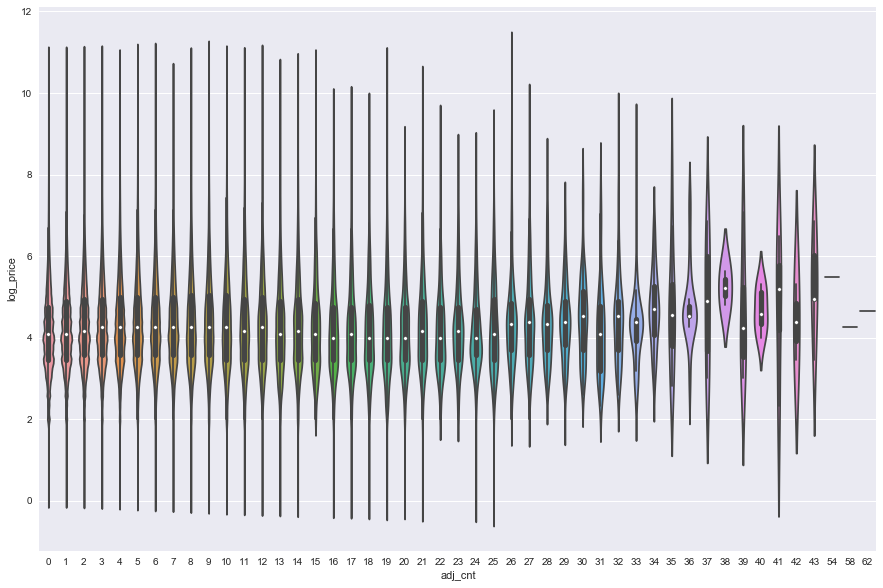

In [68]:
sns.set(context='notebook', rc={'figure.figsize': (15, 10)})
print(train.groupby('adj_cnt')['log_price'].count())
sns.violinplot(x='adj_cnt', y='log_price', data=train)

verb_cnt
0     372955
1     291362
2     196408
3     133863
4      98120
5      73052
6      56542
7      43126
8      33846
9      27033
10     22178
11     18371
12     15778
13     13315
14     10816
15      9327
16      8266
17      7358
18      6199
19      5674
20      5279
21      4432
22      3706
23      3714
24      2943
25      2545
26      2509
27      1968
28      1780
29      1541
30      1364
31      1174
32       942
33       768
34       817
35       469
36       555
37       353
38       371
39       245
40       296
41       274
42       210
43       165
44       124
45       103
46        53
47        94
48        51
49        40
50        19
51        17
52         7
53         6
54         6
55         4
56         1
58         1
Name: log_price, dtype: int64


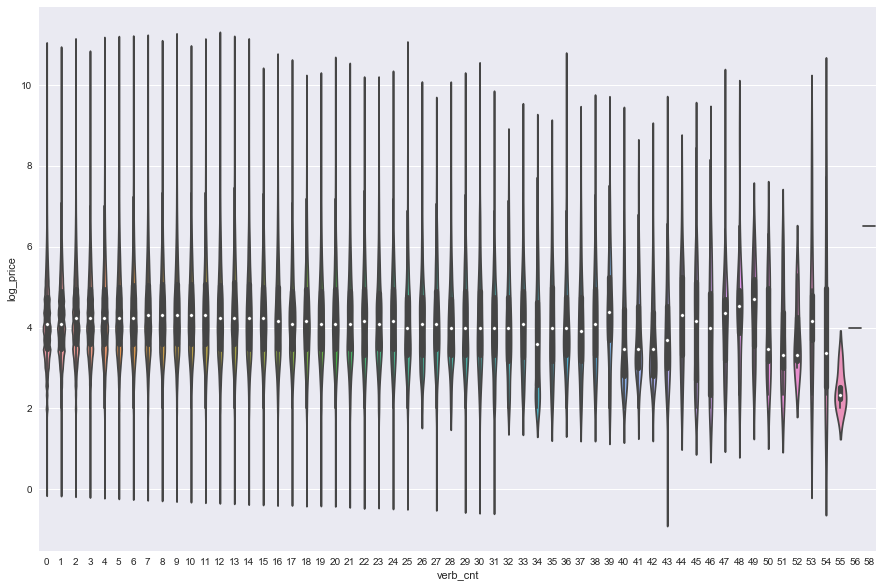

In [67]:
print(train.groupby('verb_cnt')['log_price'].count())
sns.violinplot(x='verb_cnt', y='log_price', data=train)
sns.set()

In [75]:
tmp = train[['name', 'brand_name']].head()
tmp['name'] + ';' + tmp['brand_name']

0    MLB Cincinnati Reds T Shirt Size XL;No-Brand
1          Razer BlackWidow Chroma Keyboard;Razer
2                           AVA-VIV Blouse;Target
3                  Leather Horse Statues;No-Brand
4                   24K GOLD plated rose;No-Brand
dtype: object

In [60]:
import matplotlib as mpl
[k for k in mpl.rcParams.keys() if 'size' in k]

['agg.path.chunksize',
 'axes.labelsize',
 'axes.titlesize',
 'boxplot.flierprops.markersize',
 'boxplot.meanprops.markersize',
 'errorbar.capsize',
 'figure.figsize',
 'figure.titlesize',
 'font.size',
 'legend.fontsize',
 'lines.markersize',
 'ps.papersize',
 'xtick.labelsize',
 'xtick.major.size',
 'xtick.minor.size',
 'ytick.labelsize',
 'ytick.major.size',
 'ytick.minor.size']